<a href="https://colab.research.google.com/github/biancco/SOMA-vision-task/blob/main/Yolov5_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Yolov5 pre-trained model**을 사용한 시연 및 추론시간 (inference time) 측정용

해당 모델은 COCO 데이터셋을 통해 학습되었으며 정해진 크기로 resize된 후 추론이 이루어짐. 사이즈별 소요시간과 추론 정확도는 Yolov5 레포에 그래프로 나타내어져 있음

Small 사이즈의 경우 

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 12447, done.
remote: Total 12447 (delta 0), reused 0 (delta 0), pack-reused 12447
Receiving objects: 100% (12447/12447), 12.15 MiB | 26.20 MiB/s, done.
Resolving deltas: 100% (8591/8591), done.


In [17]:
!pip install -r ./yolov5/requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import torch
small_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom
# local_model = torch.load('./yolov5s.pt')

#Code for local-machines
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2022-7-11 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/78.2 GB disk)


mkdir: cannot create directory ‘./yolov5/runs/detect/exp’: No such file or directory
detect: weights=['yolov5s.pt'], source=./gangnam.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-289-g526e650 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/gangnam.jpg: 448x640 2 persons, 3 cars, 1 motorcycle, 4 buss, 3 traffic lights, 1 umbrella, Done. (0.019s)
Speed: 0.6ms pre-process, 18.8ms inference, 17.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


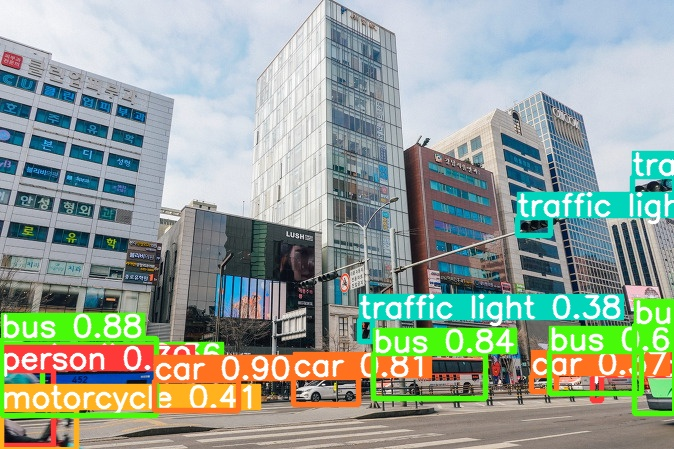

In [13]:
!rm -r ./yolov5/runs/detect
!mkdir ./yolov5/runs/detect/exp

#온라인 이미지 파일을 사용하면 다운로드 받는 시간이 오래걸림(~100ms) 직접 업로드한 파일을 사용할 것
!python ./yolov5/detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source ./gangnam.jpg  #source image for small size
# !python ./yolov5/detect.py --weights yolov5m.pt --img 1280 --conf 0.25 --source ./sample1.jpg  #source image for small size
!sleep 0.5
display.Image(filename='./yolov5/runs/detect/exp/gangnam.jpg', width=600)

In [19]:
# Images
# img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list
img = './gangnam.jpg'

# Inference
results = small_model(img)

# Results
results.print()
results.pandas().xyxy[0]

image 1/1: 449x674 3 persons, 4 cars, 1 motorcycle, 4 buss, 3 traffic lights, 1 umbrella
Speed: 19.4ms pre-process, 21.8ms inference, 2.3ms NMS per image at shape (1, 3, 448, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,153.563965,379.616577,237.878021,410.439240,0.901170,2,car
1,1.436131,338.279419,155.732849,415.543091,0.875182,5,bus
2,633.959534,324.160156,673.532593,412.901703,0.855759,5,bus
3,372.971191,353.338440,484.742310,398.223480,0.840307,5,bus
4,292.894989,376.900757,357.497772,404.231476,0.814067,2,car
5,549.584961,350.521057,640.682312,392.789032,0.687375,5,bus
6,516.975464,216.755524,549.926941,234.968842,0.418359,9,traffic light
7,1.046215,409.372009,75.828331,449.000000,0.410861,3,motorcycle
8,631.639221,175.856064,674.000000,195.362274,0.401953,9,traffic light
9,0.564627,369.912628,52.664501,444.559875,0.389747,0,person
